### Properties of F-distribution 

$d_1 =$ degrees of freedom for the numerator.

$d_2 =$ degrees of freedom for the denominator.

$E[F] = \frac{d_2}{d_2-2}$ for $d_2 > 2$

$Var(F) = \frac{2 \cdot d_2^2 \cdot (d_1+d_2-2)}{d_1(d_2-2)^2 \cdot (d_2-4)}$ for $d_2>4$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd 
import random
import statistics
import seaborn as sns 
import collections
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)
import os

In [5]:
%%time
np.random.seed(1)

pop_size = 10000
sample_size = 100

## Generating a normally distributed population with mean, 0 and variance, 1. 
pop_1 = np.random.normal(0, 1, size=pop_size)

## Taking 10,000 samples and collecting sample variances. 
sample_var_list_1 = [] 
for i in range(10000):
    inx = np.random.randint(pop_size, size=sample_size)
    sample = pop_1[inx]
    sample_var = statistics.variance(sample) 
    sample_var_list_1.append(sample_var)

Wall time: 23.7 s


In [9]:
np.random.seed(1)

pop_2 = np.random.normal(0, 1, size=pop_size)

## Taking 10,000 samples and collecting sample variances. 
sample_var_list_2 = [] 
for i in range(10000):
    inx = np.random.randint(pop_size, size=sample_size)
    sample = pop_2[inx]
    sample_var = statistics.variance(sample) 
    sample_var_list_2.append(sample_var)

In [22]:
f_stat_list = np.divide(sample_var_list_1,sample_var_list_2)

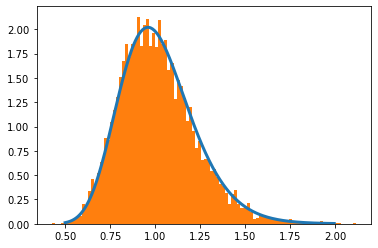

In [40]:
x = np.arange(0.5,2,0.005)

plt.plot(x,stats.f.pdf(x,99,99), lw=3)
plt.hist(f_stat_list,bins=100, density=True)
plt.show()

F statistic $= \frac{S_x^2}{S_y^2}$

With this F statistic, we can plot the distribution. And we get something like the one above. There is an assumption that the sample sizes for both sets of samples are 100. 

Say there are two different populations. We want to know that if they have same variance. 

In [63]:
np.random.seed(1)
denom_var = sample_var_list_2[np.random.randint(0,10000)]
print(denom_var)

0.8600231814247536


Say that I have sample variance of 0.86 for a sample that is drawn from one population. And I have another sample variance of 2 for a sample that is drawn from another population. Then we can calculate the f-statistic like the following: 

In [69]:
2/denom_var

2.3255187106546464

The resultant value for the f-stat is 2.32 which goes well beyond 5% significance level, so we reject the null. 

## Understanding F-test

**Great Reference!:** https://statisticsbyjim.com/anova/f-tests-anova/

**I think this is the same as the one above:** 
https://blog.minitab.com/en/adventures-in-statistics-2/understanding-analysis-of-variance-anova-and-the-f-test

**Reference for SST = SSR + SSE:** https://365datascience.com/tutorials/statistics-tutorials/sum-squares/

**Demonstration of calculating SSW and SSB:** https://www.khanacademy.org/math/statistics-probability/analysis-of-variance-anova-library/analysis-of-variance-anova/v/anova-2-calculating-ssw-and-ssb-total-sum-of-squares-within-and-between-avi

$F = \frac{between-groups-variance}{within-group-variance}$

In [131]:
path = os.getcwd()+"\\data\\OneWayExample.csv"
df = pd.read_csv(path)

In [132]:
group_means = df.groupby("Sample").mean()
group_means

,Strength
Sample,
1,11.202520
2,8.937722
3,10.682546
4,8.837952


In [161]:
GM = np.mean(df["Strength"].values)
GM

9.91518532142282

In [149]:
SST = np.sum(np.square(df["Strength"].values-grand_mean))
SST

202.08535988928105

In [168]:
SSW_sum_j_list = []

for i in range(1,5):
    X_ij = df[df["Sample"]==i]["Strength"].values
    X_bar_i = np.mean(df[df["Sample"]==i]["Strength"].values)
    
    sum_j = np.sum(np.square(X_ij-X_bar_i))
    SSW_sum_j_list.append(sum_j)
    
SSW = np.sum(SSW_sum_j_list)
SSW

158.46597790896953

In [169]:
n = 10
SSB_sum_j_list = []

for i in range(1,5):
    X_ij = df[df["Sample"]==i]["Strength"].values
    X_bar_i = np.mean(df[df["Sample"]==i]["Strength"].values)
    SSB_sum_j_list.append(np.dot(np.square(X_bar_i-GM),n))
    
SSB = np.sum(SSB_sum_j_list)
SSB

43.61938198031151

In [170]:
SSW+SSB

202.08535988928105

In [176]:
n = 10
m = 4

df_SST = m*n-1
df_SSW = m*(n-1)
df_SSB = m-1

In [178]:
MS_SST = SST/df_SST
MS_SSW = SSW/df_SSW
MS_SSB = SSB/df_SSB

In [180]:
print(MS_SST)
print(MS_SSW)
print(MS_SSB)

5.18167589459695
4.401832719693598
14.53979399343717


In [181]:
MS_SSB/MS_SSW

3.30312279437308

### Okay, From now, I am going to demonstrate F-Distribution 

H0: $\mu_0 = \mu_1 = \mu_2$

HA: One or all of the equalities do not hold. 

In [241]:
m = 3
n = 10

df_SSW = m*(n-1)
df_SSB = m-1

In [ ]:
def cal_F_stat(a_list):
    m = 3
    n = 10
    
    ## calculate grand mean
    GM = np.mean(np.array(a_list))
    
    ## define dfs 
    df_SSW = m*(n-1)
    df_SSB = m-1
    
    ## cal_mean_SSW
    SSW_sum_j_list = []
    for i in range(len(a_list)):
        X_ij = a_list[i]
        X_bar_i = np.mean(a_list[i])
        
        sum_j = np.sum(np.square(X_ij-X_bar_i))
        SSW_sum_j_list.append(sum_j)
        
    SSW = np.sum(SSW_sum_j_list)
    MSSW = SSW/df_SSW 
    
    ## cal_mean_SSB
    SSB_sum_j_list = [] 
    for i in range(len(a_list)):
        X_ij = a_list[i]
        X_bar_i = np.mean(a_list[i])
        
        SSB_sum_j_list.append(np.dot(np.square(X_bar_i-GM),n))
        
    SSB = np.sum(SSB_sum_j_list)
    MSSB = SSB/df_SSB
    
    F_stat = MSSB/MSSW
    return F_stat

In [234]:
pop_size = 10000
sample_size = 10

pop_mean = 10
pop_std = 1

pop = np.random.normal(pop_mean, pop_std, size = pop_size)

F_stat_list = []
for q in range(1000):
    three_samples_list=[]
    for i in range(3):
        inx = np.random.randint(pop_size, size=sample_size)
        three_samples_list.append(pop[inx])

    F_stat = cal_F_stat(three_samples_list)
    F_stat_list.append(F_stat)

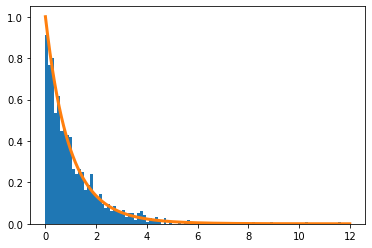

In [244]:
x = np.arange(0,12,0.01)

plt.hist(F_stat_list, bins=100, density=True)

plt.plot(x, stats.f.pdf(x,df_SSB, df_SSW), lw=3)

plt.show()


In [318]:
three_samples_list=[]
for i in range(3):
    inx = np.random.randint(pop_size, size=sample_size)
    three_samples_list.append(pop[inx])

F_stat = cal_F_stat(three_samples_list)
F_stat

0.5696375355736841

In [284]:
stats.f.ppf(0.90, df_SSB, df_SSW)

2.5106086665585408

### Let me try another one with different populations means

In [ ]:
pop_size = 10000
sample_size = 10

pop_mean = 10
pop_std = 1

pop = np.random.normal(pop_mean, pop_std, size = pop_size)

F_stat_list = []
for q in range(1000):
    three_samples_list=[]
    for i in range(3):
        inx = np.random.randint(pop_size, size=sample_size)
        three_samples_list.append(pop[inx])

    F_stat = cal_F_stat(three_samples_list)
    F_stat_list.append(F_stat)

In [325]:
pop_size = 1000

pop_1_mean = 10
pop_2_mean = 14
pop_3_mean = 16

pop_1_std = 1
pop_2_std = 1
pop_3_std = 1

pop_1 = np.random.normal(pop_1_mean, pop_1_std, size = pop_size)
pop_2 = np.random.normal(pop_2_mean, pop_2_std, size = pop_size)
pop_3 = np.random.normal(pop_3_mean, pop_3_std, size = pop_size)

pop_list = [pop_1, pop_2, pop_3]

F_stat_list = []
for q in range(1000):
    three_samples_list = []
    for i in range(3):
        inx = np.random.randint(pop_size, size=sample_size)
        three_samples_list.append(pop_list[i][inx])
        
    F_stat = cal_F_stat(three_samples_list)
    F_stat_list.append(F_stat)


### It looks like it doesn't follow any distribution.

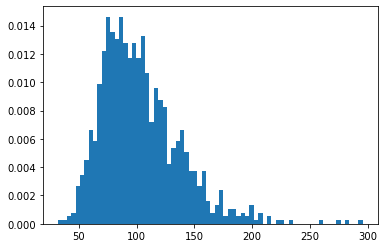

In [328]:
plt.hist(F_stat_list, bins=70, density=True)
plt.show()